# 평균이동(Mean Shift)

## 평균이동 개요

- K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행


- 중심을 `데이터가 모여 있는 밀도가 가장 높은 곳`으로 이동시킴
    - K-평균은 중심에 소속된 데이터의 평균거리 중심으로 이동
    
    
- 데이터의 분포도를 이용해 군집 중심점을 찾음
    
    
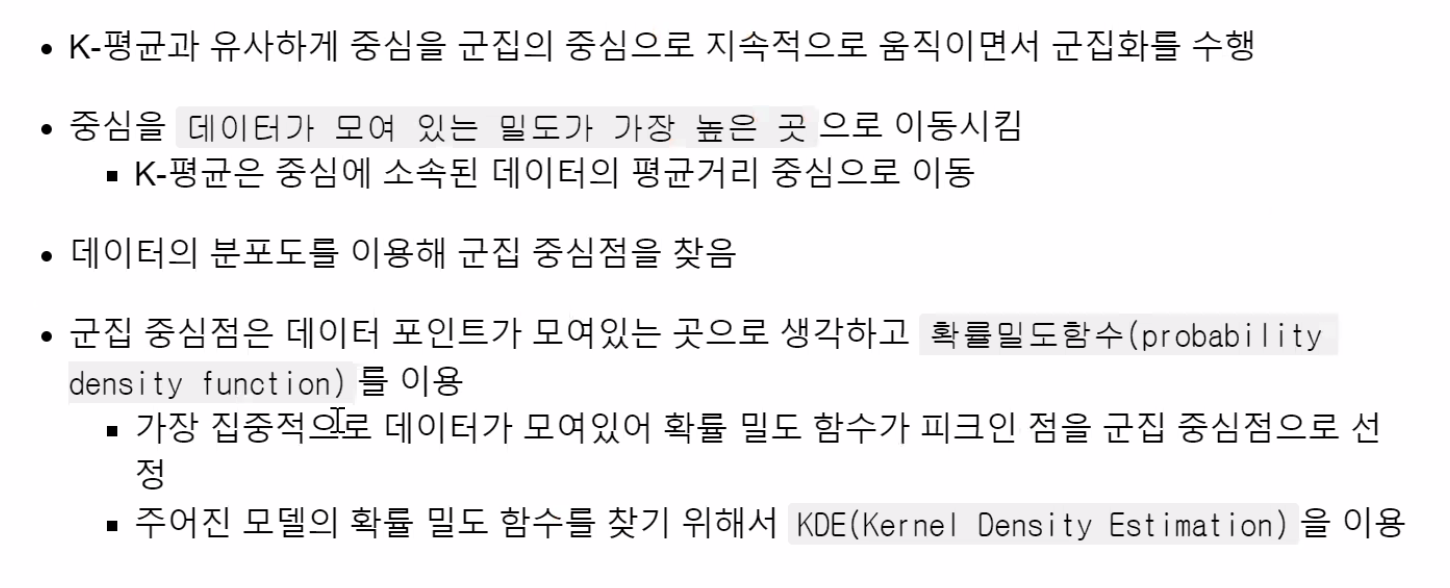

### 평균이동 방법

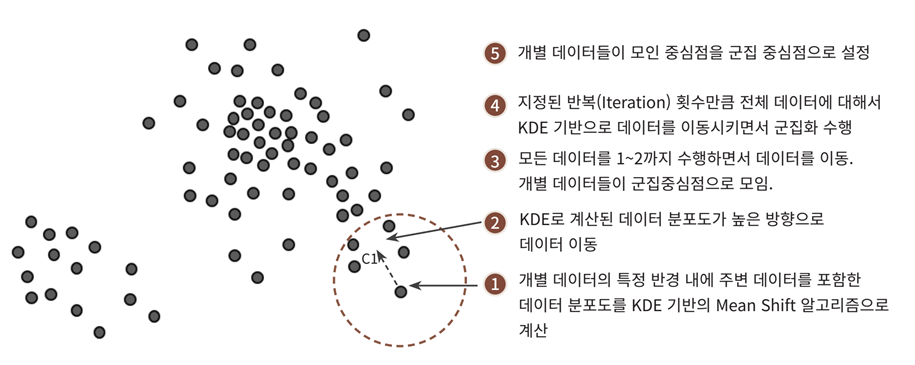

**KDE(Kernel Density Estimation)**
- 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법

    - 확률 밀도 함수(Probability Density Estimation)
        - 확률 변수의 분포

- 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정
- 대표적인 커널 함수 : 가우지안(Gaussian) 분포 함수

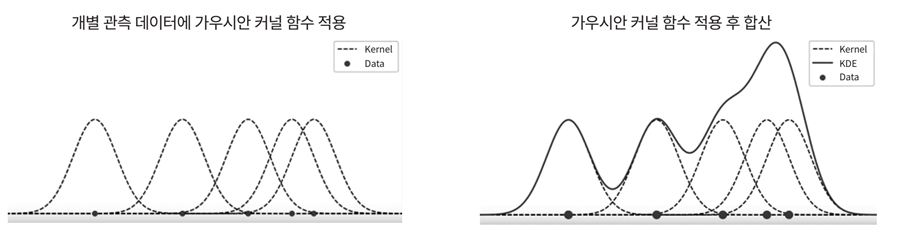

**커널 함수식**
- $K$ : 커널 함수, $x$ : 확률변수값,  $x_i$ : 관측값, $h$ : 대역폭

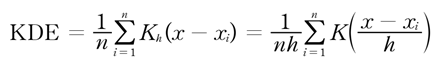

- 대역폭 $h$는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(smoothing)하는데 적용
- h값 크기에 따라 확률밀도 추정 성능을 좌우하게 됨
    - h값이 작을수록 과대적합(overfitting)을 하기 쉬움
    - h값이 클수로 과도하게 평활화된 KDE로 지나치게 단순화되어 과소적합(underfitting)하기 쉬움

- 적절한 대역폭 h를 계산하는 것은 KDE 기반의 평균 이동 군집화에서 매우 중요함

### 평균 이동 군집화와 대역폭의 관계
- **`대역폭이 클수록`** 평활화된 KDE로 **`적은 수의 군집 중심점`**을 가짐
- **`대역폭이 작을수록` `많은 수의 군집 중심점`**을 가짐

### 사이킷런의 평균 이동 군집화 클래스 MeanShift

**MeanShift(bandwidth)**
- bandwidth : KDE의 대역폭 h와 동일


**estimate_bandwidth() 함수**
- 최적의 대역폭 계산 함수

### 예제
- make_blobs()을 이용하여 cluster_std가 0.7로 정한 3개 군집 데이터에 대해 bandwidth를 0.8로 설정한 평균 이동 군집화 알고리즘 적용

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

In [3]:
import numpy as np
from sklearn.datasets import make_blobs

X , y = make_blobs(n_samples=200, n_features=2, centers=3 , cluster_std=0.7 , random_state=0)

# n_samples : 표본 데이터의 수, 디폴트 100

# n_features : 독립 변수의 수, 디폴트 20

# centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3

# cluster_std: 클러스터의 표준 편차, 디폴트 1.0

In [12]:
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)

print('cluster labels 유형 : ' , np.unique(cluster_labels))
print('cluster labels 유형의 갯수 : ' , np.unique(cluster_labels, return_counts=True))

# 군집이 지나치게 세분화되었다.
# bandwith가 낮으면 지나치게 센터가 많이 만들어진다

cluster labels 유형 :  [0 1 2 3 4 5]
cluster labels 유형의 갯수 :  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([57, 60, 51, 15, 10,  7], dtype=int64))


- bandwidth를 1로 높여 평균 이동 군집화 수행

In [7]:
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)

print('cluster labels 유형 : ' , np.unique(cluster_labels))
print('cluster labels 유형의 갯수 : ' , np.unique(cluster_labels, return_counts=True))

cluster labels 유형 :  [0 1 2]
cluster labels 유형의 갯수 :  (array([0, 1, 2], dtype=int64), array([67, 67, 66], dtype=int64))


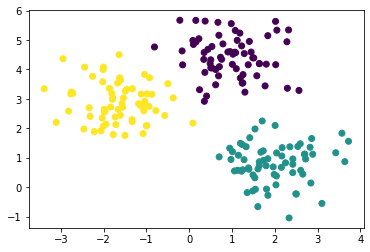

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0] , X[:,1] , c=y)

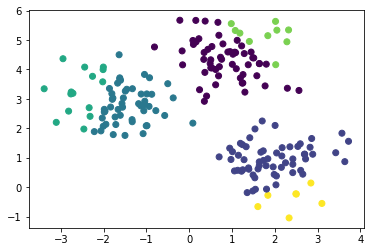

In [14]:
plt.scatter(X[:,0] , X[:,1] , c=cluster_labels)

cluster labels 유형 :  (array([0, 1, 2], dtype=int64), array([67, 67, 66], dtype=int64))


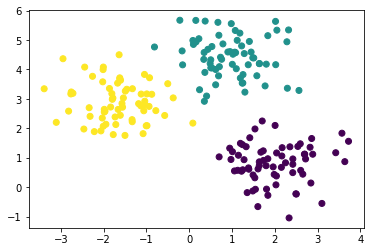

In [15]:
# bandwith를 1로 증가
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ' , np.unique(cluster_labels, return_counts=True))
plt.scatter(X[:,0] , X[:,1] , c=cluster_labels)

cluster labels 유형 :  (array([0, 1, 2], dtype=int64), array([67, 67, 66], dtype=int64))


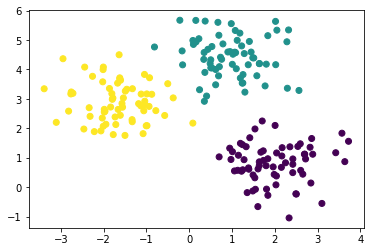

In [16]:
# bandwith를 1.2로 증가
meanshift = MeanShift(bandwidth=1.2)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ' , np.unique(cluster_labels, return_counts=True))
plt.scatter(X[:,0] , X[:,1] , c=cluster_labels)

cluster labels 유형 :  (array([0, 1, 2], dtype=int64), array([66, 67, 67], dtype=int64))


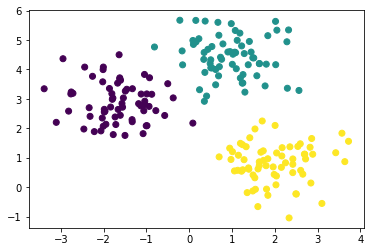

In [17]:
# bandwith를 2로 증가
meanshift = MeanShift(bandwidth=2)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ' , np.unique(cluster_labels, return_counts=True))
plt.scatter(X[:,0] , X[:,1] , c=cluster_labels)

cluster labels 유형 :  (array([0], dtype=int64), array([200], dtype=int64))


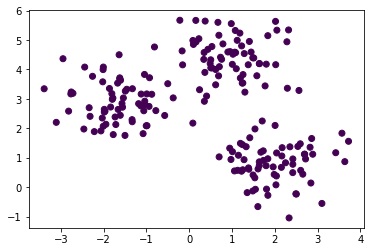

In [18]:
# bandwith를 3로 증가
meanshift = MeanShift(bandwidth=3)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ' , np.unique(cluster_labels, return_counts=True))
plt.scatter(X[:,0] , X[:,1] , c=cluster_labels)

### 적절한 bandwidth를 찾기 위한 함수 : estimate_bandwidth()

In [26]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth value : ' , bandwidth)

bandwidth value :  1.8158484154517098


- 적정한 bandwidth를 계산하여 이를 적용한 평균 이동 군집화 수행 

cluster labels 유형 :  (array([0, 1, 2], dtype=int64), array([67, 67, 66], dtype=int64))


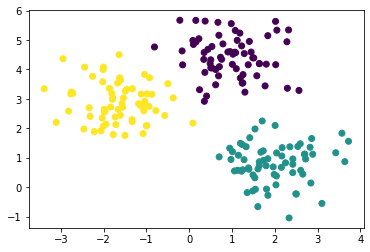

In [28]:
meanshift = MeanShift(bandwidth=bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ' , np.unique(cluster_labels, return_counts=True))
plt.scatter(X[:,0] , X[:,1] , c=cluster_labels)

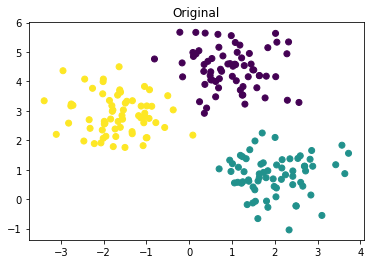

In [29]:
plt.scatter(X[:,0] , X[:,1] , c=y)
plt.title('Original')
plt.show()

### 구성된 3개의 군집 시각화

cluster label 유형 (array([0, 1, 2], dtype=int64), array([67, 67, 66], dtype=int64))


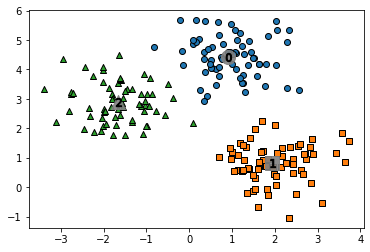

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 직접 만들어보기!!!!!!!!!!

clusterDF = pd.DataFrame(data=X , columns=['ftr1' , 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth() 로 최적의 bandwidth 계산
from sklearn.cluster import estimate_bandwidth
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster label 유형' , np.unique(cluster_labels , return_counts=True))


clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], 
                edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, 
                color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, 
                color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

- target 값과 군집 label 값 비교

In [25]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())


target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


    - traget값과 군집 label이 1:1로 잘 매칭됨

### 평균 이동 군집화의 장단점
**장점**
- 데이터 세트의 형태를 특정 형태로 가정하거나 특정 분포도 기반의 모델로 가정하지 않으므로 좀 더 유연한 군집화가 가능함
- 이상치의 영향력이 크지 않음
- 미리 군집의 개수를 정할 필요가 없음

**단점**
- 알고리즘 수행 시간이 오래 걸림
- bandwidth의 크기에 따른 군집화 영향도가 매우 큼


### 평균이동 군집화 활용 분야
- 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 더 많이 사용됨
- 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는데 뛰어난 역할을 수행하는 알고리즘